## Linear Regression - Single Variable

Simple linear regression with one input variable and one output variable.

**Formula:**
$$y = wx + b$$

**Cost Function:**
$$C = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2$$

**Gradients:**
$$\frac{\partial C}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} x_i(y_i - (wx_i + b))$$
$$\frac{\partial C}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import random


## Generate Sample Data
Create a simple dataset with linear relationship and some noise.


In [2]:
# Generate sample data
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 1) * 10  # Input features
true_w = 2.5  # True slope
true_b = 1.0  # True intercept
noise = np.random.randn(n_samples, 1) * 2  # Add noise
y = true_w * X + true_b + noise  # True relationship with noise

print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"True parameters: w={true_w}, b={true_b}")


Data shape: X=(100, 1), y=(100, 1)
True parameters: w=2.5, b=1.0


## Visualize the Data


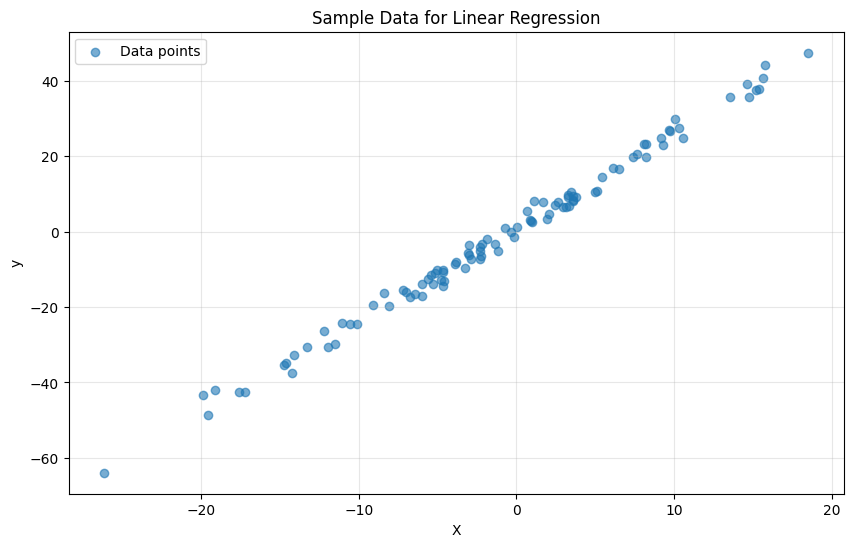

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data for Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Linear Regression Implementation

Implement linear regression from scratch using gradient descent.


In [4]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.w = None  # slope
        self.b = None  # intercept
        self.cost_history = []
    
    def predict(self, X):
        """Make predictions using current parameters"""
        return self.w * X + self.b
    
    def compute_cost(self, X, y):
        """Compute mean squared error cost"""
        n = len(X)
        predictions = self.predict(X)
        cost = (1 / (2 * n)) * np.sum((y - predictions) ** 2)
        return cost
    
    def compute_gradients(self, X, y):
        """Compute gradients for w and b"""
        n = len(X)
        predictions = self.predict(X)
        
        # Gradient for w (slope)
        dw = (1 / n) * np.sum(X * (predictions - y))
        
        # Gradient for b (intercept)
        db = (1 / n) * np.sum(predictions - y)
        
        return dw, db
    
    def fit(self, X, y):
        """Train the linear regression model"""
        # Initialize parameters
        self.w = np.random.randn()
        self.b = np.random.randn()
        
        print(f"Initial parameters: w={self.w:.4f}, b={self.b:.4f}")
        
        # Gradient descent
        for i in range(self.max_iterations):
            # Compute cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
            
            # Compute gradients
            dw, db = self.compute_gradients(X, y)
            
            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            
            # Print progress
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}, w = {self.w:.4f}, b = {self.b:.4f}")
        
        print(f"\nFinal parameters: w={self.w:.4f}, b={self.b:.4f}")
        print(f"True parameters:  w={true_w:.4f}, b={true_b:.4f}")
        
        return self


## Train the Model


In [5]:
# Create and train the model
model = LinearRegression(learning_rate=0.01, max_iterations=1000)
model.fit(X, y)


Initial parameters: w=0.3578, b=0.5608
Iteration 0: Cost = 185.658425, w = 2.1016, b = 0.5434
Iteration 100: Cost = 1.782965, w = 2.4691, b = 0.8383
Iteration 200: Cost = 1.769425, w = 2.4705, b = 0.9493
Iteration 300: Cost = 1.767562, w = 2.4710, b = 0.9906
Iteration 400: Cost = 1.767306, w = 2.4712, b = 1.0058
Iteration 500: Cost = 1.767271, w = 2.4713, b = 1.0115
Iteration 600: Cost = 1.767266, w = 2.4713, b = 1.0136
Iteration 700: Cost = 1.767265, w = 2.4713, b = 1.0144
Iteration 800: Cost = 1.767265, w = 2.4713, b = 1.0147
Iteration 900: Cost = 1.767265, w = 2.4713, b = 1.0148

Final parameters: w=2.4713, b=1.0148
True parameters:  w=2.5000, b=1.0000


## Visualize Results


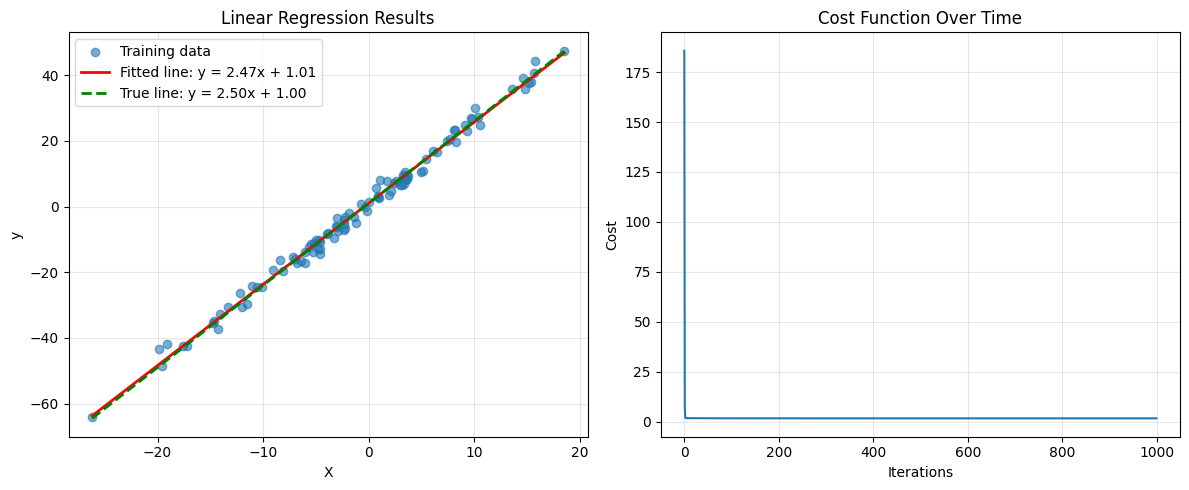

In [6]:
# Make predictions
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot results
plt.figure(figsize=(12, 5))

# Plot 1: Data and fitted line
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.6, label='Training data')
plt.plot(X_test, y_pred, 'r-', linewidth=2, label=f'Fitted line: y = {model.w:.2f}x + {model.b:.2f}')
plt.plot(X_test, true_w * X_test + true_b, 'g--', linewidth=2, label=f'True line: y = {true_w:.2f}x + {true_b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cost function over iterations
plt.subplot(1, 2, 2)
plt.plot(model.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Time')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Model Evaluation


In [7]:
# Calculate metrics
y_pred_train = model.predict(X)
mse = np.mean((y - y_pred_train) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y - y_pred_train) ** 2) / np.sum((y - np.mean(y)) ** 2))

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"\nLearned parameters:")
print(f"Slope (w): {model.w:.4f} (True: {true_w:.4f})")
print(f"Intercept (b): {model.b:.4f} (True: {true_b:.4f})")


Model Performance:
Mean Squared Error (MSE): 3.5345
Root Mean Squared Error (RMSE): 1.8800
R-squared: 0.9930

Learned parameters:
Slope (w): 2.4713 (True: 2.5000)
Intercept (b): 1.0148 (True: 1.0000)


## Comparison with Analytical Solution

For linear regression, we can also compute the optimal parameters analytically using the normal equation.


In [8]:
# Analytical solution using normal equation
def analytical_solution(X, y):
    """Compute optimal parameters using normal equation"""
    # Add bias term (column of ones)
    X_with_bias = np.hstack([X, np.ones((X.shape[0], 1))])
    
    # Normal equation: theta = (X^T * X)^(-1) * X^T * y
    theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
    
    return theta[0, 0], theta[1, 0]  # w, b

# Get analytical solution
w_analytical, b_analytical = analytical_solution(X, y)

print("Analytical Solution:")
print(f"w = {w_analytical:.4f}")
print(f"b = {b_analytical:.4f}")

print("\nGradient Descent Solution:")
print(f"w = {model.w:.4f}")
print(f"b = {model.b:.4f}")

print("\nDifferences:")
print(f"w difference: {abs(w_analytical - model.w):.6f}")
print(f"b difference: {abs(b_analytical - model.b):.6f}")


Analytical Solution:
w = 2.4713
b = 1.0149

Gradient Descent Solution:
w = 2.4713
b = 1.0148

Differences:
w difference: 0.000000
b difference: 0.000024


## Summary

This implementation demonstrates:

1. **Single Variable Linear Regression**: $y = wx + b$
2. **Gradient Descent**: Iterative optimization algorithm
3. **Cost Function**: Mean Squared Error
4. **Visualization**: Data points, fitted line, and cost convergence
5. **Evaluation**: MSE, RMSE, and R-squared metrics
6. **Comparison**: Gradient descent vs analytical solution

The model learns the optimal slope (w) and intercept (b) to minimize the prediction error on the training data.
